In [1]:
# ---- EDA Básico: Cargar dataset y exploración inicial ----

import pandas as pd

# Cargar dataset reducido (ya limpio y fusionado)
df = pd.read_csv("../data/fusionado_reducido.csv")

# Info general del dataset
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos y nulos:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Primeras filas
print("\nPrimeras filas del dataset:")
display(df.head())


Dimensiones del dataset: (60616, 22)

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60616 entries, 0 to 60615
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          60616 non-null  object
 1   company_name      60616 non-null  object
 2   job_description   60616 non-null  object
 3   job_title         60616 non-null  object
 4   job_type          60616 non-null  object
 5   location          60616 non-null  object
 6   post_date         60616 non-null  object
 7   salary_offered    60616 non-null  object
 8   year              60616 non-null  int64 
 9   geo               60616 non-null  object
 10  location_norm     60616 non-null  object
 11  freq              60616 non-null  object
 12  indic_em          60616 non-null  object
 13  sex               60616 non-null  object
 14  age               60616 non-null  object
 15  unit              60616 non-null  object
 

/var/folders/db/fwv1r_095jb9mrrg1vk739s00000gn/T/ipykernel_23045/3397379740.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/fusionado_reducido.csv")


,category,company_name,job_description,job_title,job_type,location,post_date,salary_offered,year,geo,...,indic_em,sex,age,unit,employment_value,post_month,post_quarter,title_length,desc_length,region_group
0,Clinical Research,CK Clinical,Julia Day is recruiting for an experienced Me...,EMEA Medical Information Manager,Permanent,Switzerland,2018-04-11,Competitive,2018,CH,...,EMP_LFS,M,Y15-29,THS_PER,545.0,4,2,33,1670,Switzerland
1,Switzerland,NonStop Recruitment,Product Manager-Hospital products-Switzerland...,Product Manager,Permanent,switzerland,2018-04-12,Swiss Franc70k - Swiss Franc80k pa + bonus and...,2018,CH,...,EMP_LFS,F,Y15-64,PC_POP,75.7,4,2,15,1734,Switzerland
2,Clinical Research,Key People Limited,We have an exciting opportunity for an office ...,Senior Global Clinical Project Manager,Contract/Interim,Switzerland,2018-04-06,75 - 85 p hour,2018,CH,...,EMP_LFS,T,Y15-29,PC_POP,71.7,4,2,39,4816,Switzerland
3,Science,Kinetica (UK) Ltd,Kinetica are currently recruiting for a market...,Regulatory Affairs Specialist,Permanent,Switzerland,2018-04-12,"CHF 95,000-110,000",2018,CH,...,EMP_LFS,F,Y15-29,THS_PER,500.0,4,2,29,1501,Switzerland
4,Clinical Research,S E C Recruitment Limited,I am currently working very closely with a hi...,Contract Clinical SAS Programmer (SDTM focused...,Contract/Interim,Switzerland,2018-04-09,Neg,2018,CH,...,EMP_LFS,T,Y20-64,PC_POP,82.5,4,2,54,1501,Switzerland


In [2]:
# ----- EDA Básico: Análisis general de estructura y variables -----

# 1️⃣ Resumen general del dataset
print("Resumen general del dataset:")
print("- Número de filas:", df.shape[0])
print("- Número de columnas:", df.shape[1])
print("- Columnas disponibles:", list(df.columns))

# 2️⃣ Tipos de datos y número de valores únicos
print("\nTipos de datos y número de valores únicos:")
for col in df.columns:
    print(f"{col:20} -> tipo: {df[col].dtype}, únicos: {df[col].nunique()}")

# 3️⃣ Columnas categóricas vs numéricas
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(exclude="object").columns.tolist()

print("\nColumnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

# 4️⃣ Valores más frecuentes por columna categórica
print("\nValores más frecuentes por variable categórica:")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().head(5))

# 5️⃣ Estadísticas descriptivas generales
print("\nEstadísticas descriptivas (solo variables numéricas):")
display(df.describe())


Resumen general del dataset:
- Número de filas: 60616
- Número de columnas: 22
- Columnas disponibles: ['category', 'company_name', 'job_description', 'job_title', 'job_type', 'location', 'post_date', 'salary_offered', 'year', 'geo', 'location_norm', 'freq', 'indic_em', 'sex', 'age', 'unit', 'employment_value', 'post_month', 'post_quarter', 'title_length', 'desc_length', 'region_group']

Tipos de datos y número de valores únicos:
category             -> tipo: object, únicos: 16
company_name         -> tipo: object, únicos: 149
job_description      -> tipo: object, únicos: 2975
job_title            -> tipo: object, únicos: 1651
job_type             -> tipo: object, únicos: 6
location             -> tipo: object, únicos: 14
post_date            -> tipo: object, únicos: 15
salary_offered       -> tipo: object, únicos: 747
year                 -> tipo: int64, únicos: 1
geo                  -> tipo: object, únicos: 7
location_norm        -> tipo: object, únicos: 9
freq                 -> ti

,year,post_month,post_quarter,title_length,desc_length
count,60616.0,60616.0,60616.0,60616.000000,60616.000000
mean,2018.0,4.0,2.0,26.896084,2282.741850
std,0.0,0.0,0.0,11.856342,931.869241
min,2018.0,4.0,2.0,1.000000,312.000000
25%,2018.0,4.0,2.0,19.000000,1624.000000
50%,2018.0,4.0,2.0,27.000000,2088.000000
75%,2018.0,4.0,2.0,33.000000,2685.000000
max,2018.0,4.0,2.0,72.000000,8062.000000


----- INFORMACIÓN GENERAL DEL DATASET -----
Dimensiones: 60616 filas y 22 columnas

Tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60616 entries, 0 to 60615
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          60616 non-null  object
 1   company_name      60616 non-null  object
 2   job_description   60616 non-null  object
 3   job_title         60616 non-null  object
 4   job_type          60616 non-null  object
 5   location          60616 non-null  object
 6   post_date         60616 non-null  object
 7   salary_offered    60616 non-null  object
 8   year              60616 non-null  int64 
 9   geo               60616 non-null  object
 10  location_norm     60616 non-null  object
 11  freq              60616 non-null  object
 12  indic_em          60616 non-null  object
 13  sex               60616 non-null  object
 14  age               60616 non-null  

/var/folders/db/fwv1r_095jb9mrrg1vk739s00000gn/T/ipykernel_23045/2852935257.py:15: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/fusionado_reducido.csv")


,category,company_name,job_description,job_title,job_type,location,post_date,salary_offered,year,geo,...,indic_em,sex,age,unit,employment_value,post_month,post_quarter,title_length,desc_length,region_group
0,Clinical Research,CK Clinical,Julia Day is recruiting for an experienced Me...,EMEA Medical Information Manager,Permanent,Switzerland,2018-04-11,Competitive,2018,CH,...,EMP_LFS,M,Y15-29,THS_PER,545.0,4,2,33,1670,Switzerland
1,Switzerland,NonStop Recruitment,Product Manager-Hospital products-Switzerland...,Product Manager,Permanent,switzerland,2018-04-12,Swiss Franc70k - Swiss Franc80k pa + bonus and...,2018,CH,...,EMP_LFS,F,Y15-64,PC_POP,75.7,4,2,15,1734,Switzerland
2,Clinical Research,Key People Limited,We have an exciting opportunity for an office ...,Senior Global Clinical Project Manager,Contract/Interim,Switzerland,2018-04-06,75 - 85 p hour,2018,CH,...,EMP_LFS,T,Y15-29,PC_POP,71.7,4,2,39,4816,Switzerland
3,Science,Kinetica (UK) Ltd,Kinetica are currently recruiting for a market...,Regulatory Affairs Specialist,Permanent,Switzerland,2018-04-12,"CHF 95,000-110,000",2018,CH,...,EMP_LFS,F,Y15-29,THS_PER,500.0,4,2,29,1501,Switzerland
4,Clinical Research,S E C Recruitment Limited,I am currently working very closely with a hi...,Contract Clinical SAS Programmer (SDTM focused...,Contract/Interim,Switzerland,2018-04-09,Neg,2018,CH,...,EMP_LFS,T,Y20-64,PC_POP,82.5,4,2,54,1501,Switzerland



----- RESUMEN GENERAL -----
Número de filas: 60616
Número de columnas: 22
Columnas disponibles: ['category', 'company_name', 'job_description', 'job_title', 'job_type', 'location', 'post_date', 'salary_offered', 'year', 'geo', 'location_norm', 'freq', 'indic_em', 'sex', 'age', 'unit', 'employment_value', 'post_month', 'post_quarter', 'title_length', 'desc_length', 'region_group']

Tipos de datos y número de valores únicos:
category             -> tipo: object, únicos: 16
company_name         -> tipo: object, únicos: 149
job_description      -> tipo: object, únicos: 2975
job_title            -> tipo: object, únicos: 1651
job_type             -> tipo: object, únicos: 6
location             -> tipo: object, únicos: 14
post_date            -> tipo: object, únicos: 15
salary_offered       -> tipo: object, únicos: 747
year                 -> tipo: int64, únicos: 1
geo                  -> tipo: object, únicos: 7
location_norm        -> tipo: object, únicos: 9
freq                 -> tipo: ob

,year,post_month,post_quarter,title_length,desc_length
count,60616.0,60616.0,60616.0,60616.000000,60616.000000
mean,2018.0,4.0,2.0,26.896084,2282.741850
std,0.0,0.0,0.0,11.856342,931.869241
min,2018.0,4.0,2.0,1.000000,312.000000
25%,2018.0,4.0,2.0,19.000000,1624.000000
50%,2018.0,4.0,2.0,27.000000,2088.000000
75%,2018.0,4.0,2.0,33.000000,2685.000000
max,2018.0,4.0,2.0,72.000000,8062.000000


/var/folders/db/fwv1r_095jb9mrrg1vk739s00000gn/T/ipykernel_23045/2852935257.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="geo", palette="crest")


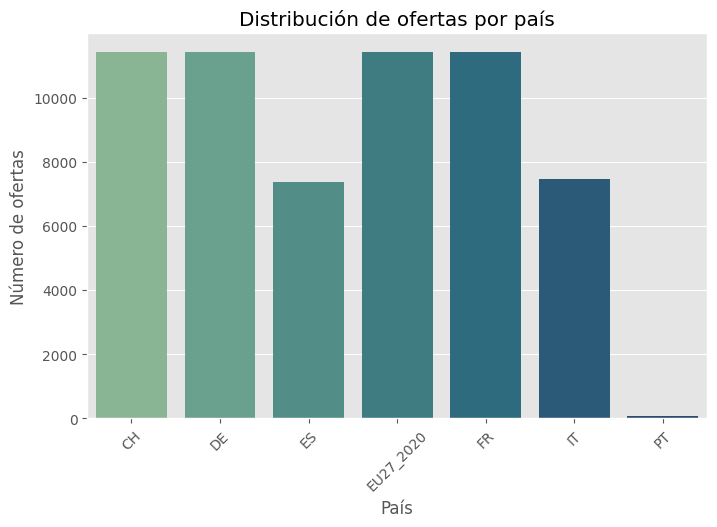

/var/folders/db/fwv1r_095jb9mrrg1vk739s00000gn/T/ipykernel_23045/2852935257.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="category", order=df["category"].value_counts().index, palette="viridis")


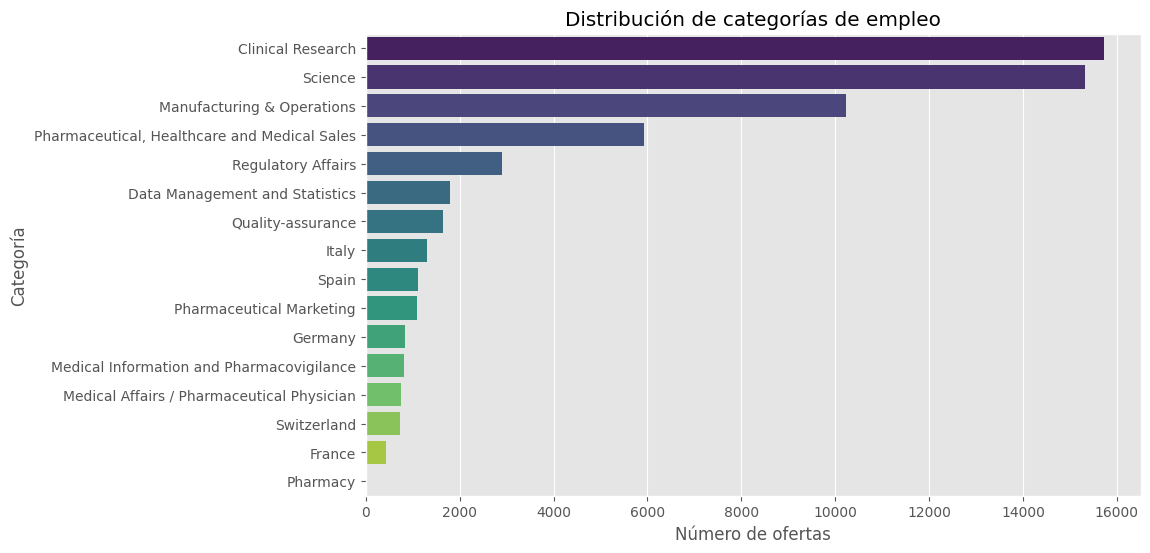

/var/folders/db/fwv1r_095jb9mrrg1vk739s00000gn/T/ipykernel_23045/2852935257.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="post_month", palette="mako")


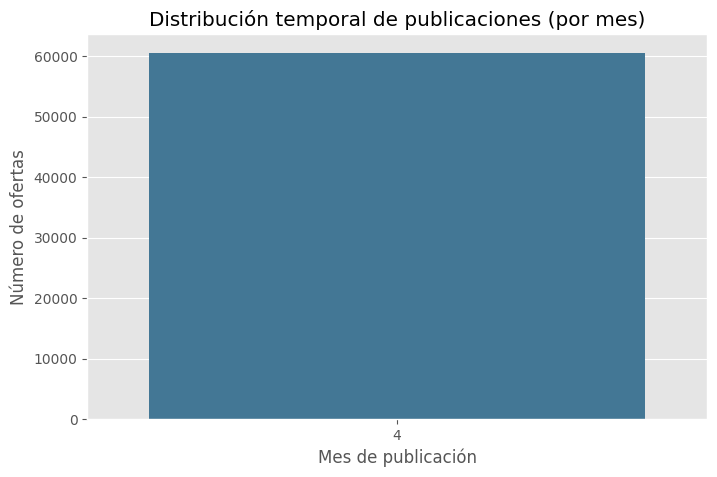

/var/folders/db/fwv1r_095jb9mrrg1vk739s00000gn/T/ipykernel_23045/2852935257.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="post_quarter", palette="rocket")


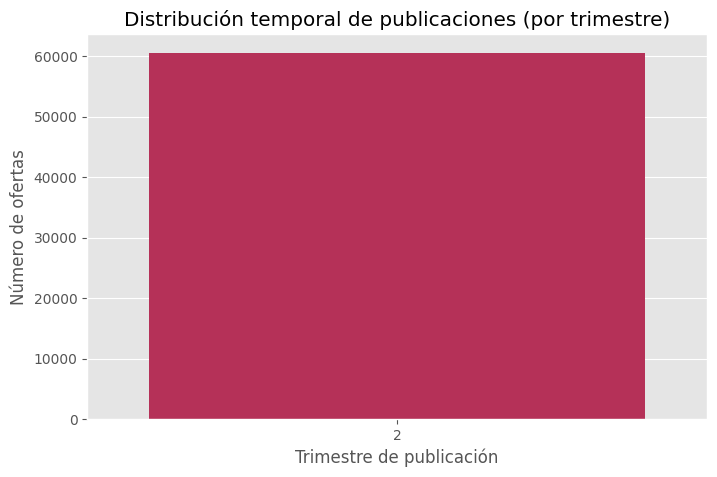

⚠️ No se encontró la columna 'salary_numeric'; se omite el análisis salarial.


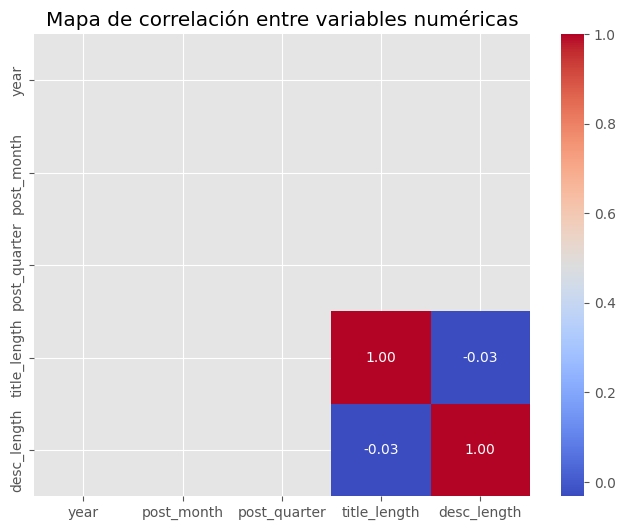


✅ EDA básico completado correctamente.


In [5]:
# ======================================================
# 02_EDA_Basico.ipynb — Exploración de Datos Inicial (EDA)
# ======================================================

# 1️⃣ Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética de los gráficos
plt.style.use("ggplot")
sns.set_palette("pastel")

# 2️⃣ Cargar el dataset limpio y reducido
df = pd.read_csv("../data/fusionado_reducido.csv")

# 3️⃣ Información general del dataset
print("----- INFORMACIÓN GENERAL DEL DATASET -----")
print(f"Dimensiones: {df.shape[0]} filas y {df.shape[1]} columnas\n")
print("Tipos de datos y valores nulos:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 4️⃣ Primeras filas
print("\nPrimeras filas del dataset:")
display(df.head())

# 5️⃣ Resumen general de variables y valores únicos
print("\n----- RESUMEN GENERAL -----")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print(f"Columnas disponibles: {list(df.columns)}\n")

print("Tipos de datos y número de valores únicos:")
for col in df.columns:
    print(f"{col:20} -> tipo: {df[col].dtype}, únicos: {df[col].nunique()}")

# 6️⃣ Estadísticas descriptivas (solo para variables numéricas)
print("\n----- ESTADÍSTICAS DESCRIPTIVAS -----")
display(df.describe())

# ======================================================
# VISUALIZACIONES BÁSICAS
# ======================================================

# 7️⃣ Distribución por países (geo)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="geo", palette="crest")
plt.title("Distribución de ofertas por país")
plt.xlabel("País")
plt.ylabel("Número de ofertas")
plt.xticks(rotation=45)
plt.show()

# 8️⃣ Distribución por categorías de empleo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="category", order=df["category"].value_counts().index, palette="viridis")
plt.title("Distribución de categorías de empleo")
plt.xlabel("Número de ofertas")
plt.ylabel("Categoría")
plt.show()

# 9️⃣ Tendencias temporales (por mes y trimestre)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="post_month", palette="mako")
plt.title("Distribución temporal de publicaciones (por mes)")
plt.xlabel("Mes de publicación")
plt.ylabel("Número de ofertas")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="post_quarter", palette="rocket")
plt.title("Distribución temporal de publicaciones (por trimestre)")
plt.xlabel("Trimestre de publicación")
plt.ylabel("Número de ofertas")
plt.show()

# 🔟 Relación entre salario y país (si existen valores numéricos)
if "salary_numeric" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="geo", y="salary_numeric", palette="viridis")
    plt.title("Distribución de salarios por país")
    plt.xlabel("País")
    plt.ylabel("Salario ofrecido")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ No se encontró la columna 'salary_numeric'; se omite el análisis salarial.")

# 1️⃣1️⃣ Mapa de correlaciones numéricas
plt.figure(figsize=(8, 6))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

print("\n✅ EDA básico completado correctamente.")
